Research Questions
1. Do students with limited english proficiency perform at the same rate as all other students?
2. Is there any specific subgroup that is outperforming all students?
3. Which subgroup is underperforming all students?

Articles
Sotelo-Dynega, M., Ortiz, S., Flanagan, D., & Chaplin, W. (2013). English Language Proficiency and Test Performance: An Evaluation of Bilingual Students with the Woodcock-Johnson III Tests of Cognitive Abilities.. Psychology in the Schools, 50, 781-797. https://doi.org/10.1002/PITS.21706.
This study found that there a relationship between language proficiency and performance on tests. More specifically, that these students not only required more english language development, but more cultural knowledge.

Aina, J., Ogundele, A., & Olanipekun, S. (2013). Students’ Proficiency in English Language Relationship with Academic Performance in Science and Technical Education. American Journal of Educational Research, 1, 355-358. https://doi.org/10.12691/EDUCATION-1-9-2.
This study investigated whether there is a correlation to academic performance in science and technical education and English language proficiency.

Beal, C., Adams, N., & Cohen, P. (2010). Reading Proficiency and Mathematics Problem Solving by High School English Language Learners. Urban Education, 45, 58 - 74. https://doi.org/10.1177/0042085909352143.
This study investigated the relationship between English language proficiency and performance on state math testing. It found that math scores improved with english language proficiency.

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
from scipy.stats import chi2
az_tests = pd.read_csv('AZ Tests - State.csv')

In [81]:
print(az_tests.columns)

Index(['Fiscal Year', 'District', 'Test Level', 'Subgroup', 'Subject',
       'Number Tested', 'Percent Passing', 'Percent Proficiency Level 1',
       'Percent Proficiency Level 2', 'Percent Proficiency Level 3',
       'Percent Proficiency Level 4'],
      dtype='object')


Subgroups not divided correctly... must split

In [82]:
az_tests['Subgroup'] = az_tests['Subgroup'].drop_duplicates()

In [ ]:
az_tests = az_tests.explode('Subgroup')

In [58]:
print(az_tests['Subgroup'].unique())

['All Students' nan 'Female' 'Male' 'Military' 'Homeless' 'Migrant'
 'Income Eligibility 1 and 2' 'Limited English Proficient'
 'Students with Disabilities' 'Asian' 'African American' 'Hispanic/Latino'
 'American Indian/Alaska Native' 'Native Hawaiian/Other Pacific Islander'
 'Two or More Races' 'White']


In [59]:
az_tests.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1622 entries, 0 to 1621
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Fiscal Year                  1622 non-null   int64 
 1   District                     1622 non-null   object
 2   Test Level                   1622 non-null   object
 3   Subgroup                     16 non-null     object
 4   Subject                      1622 non-null   object
 5   Number Tested                1622 non-null   object
 6   Percent Passing              1622 non-null   object
 7   Percent Proficiency Level 1  1622 non-null   object
 8   Percent Proficiency Level 2  1622 non-null   object
 9   Percent Proficiency Level 3  1622 non-null   object
 10  Percent Proficiency Level 4  1622 non-null   object
dtypes: int64(1), object(10)
memory usage: 152.1+ KB


In [ ]:
az_tests['Subgroup'].hist(bins=15)
plt.xticks(rotation=45)

In [110]:
az_tests['Percent Passing'] = pd.to_numeric(az_tests['Percent Passing'], errors='coerce')
average_performance = az_tests.groupby('Subgroup')['Percent Passing'].mean()
print(average_performance)

Subgroup
African American                          30.0
All Students                              42.0
American Indian/Alaska Native             20.0
Asian                                     70.0
Female                                    46.0
Hispanic/Latino                           32.0
Homeless                                  21.0
Income Eligibility 1 and 2                30.0
Limited English Proficient                 4.0
Male                                      38.0
Migrant                                   15.0
Military                                  59.0
Native Hawaiian/Other Pacific Islander    42.0
Students with Disabilities                13.0
Two or More Races                         51.0
White                                     56.0
Name: Percent Passing, dtype: float64


This provides different percent passing for all subgroups... AA, American Indian, Asian, Female. etc.
Limited English Proficient- only 4% of LEP students passing state assessments compared to 42% all students.

Subgroup that is overperforming all students is Asian subgroup.


In [101]:
filtered_data = az_tests[(az_tests['Subgroup'] == 'All Students') | (az_tests['Subgroup'] == 'Limited English Proficient')]
filtered_data['Percent Passing'] = pd.to_numeric(filtered_data['Percent Passing'], errors='coerce')
average_performance = filtered_data.groupby('Subgroup')['Percent Passing'].mean()
print(average_performance)

Subgroup
All Students                  42.0
Limited English Proficient     4.0
Name: Percent Passing, dtype: float64


<ipython-input-101-911fb0af5a97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Percent Passing'] = pd.to_numeric(filtered_data['Percent Passing'], errors='coerce')


<Axes: ylabel='Percent Passing'>

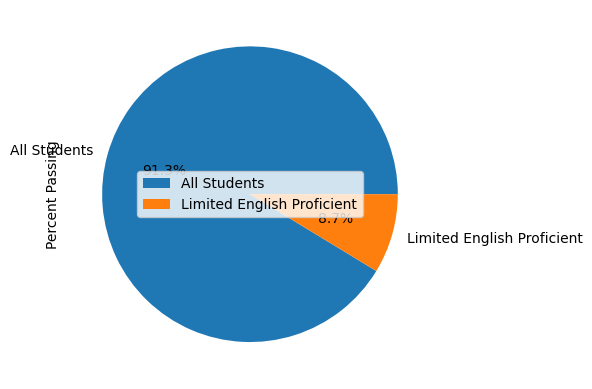

In [104]:
filtered_data.plot (kind='pie', y='Percent Passing', labels=filtered_data['Subgroup'], autopct='%1.1f%%')

Out of students who have passed state assessments, only 8.7% were Limited English Proficient students.

Hunches... revisiting my questions.
Unfortunately LEP students did as expected on state assessments. I knew that they would likely be the lowest testing group, and I did not visit whether their test scores in math were any better because newer state testing requires written explanation of answers in math.

I think that if there were levels of LEP I think there would be more to look into (at what point are LEP students performing at or above all other students?)

I think what would be most of value to be able to do a valuable connection in terms of components would be comparing this data set, against AZELLA scores (ESL testing). Unfortunately I believe for this to make the most sense, I would need to have a more specific bank of testing of LEP students. Not even necessarily each student, but more so like:
Student Group Pre/Emergent/Basic Limited English Proficient: Percent Passing- 1%

Student Group Intermediate Limited English Proficient- Percent Passing- 3%

I think realistically it doesn't make sense to put ALL limited english proficient students into the same category because then it makes it difficult to track correlation other than the most obvious (that they don't speak english). Students are still considered LEP even after they test out of ESL classes- so knowing their proficiency levels would be much more helpful.
